# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ade Ripaldi Nuralim
- **Email:** mc222d5y1277@student.devacademy.id
- **ID Dicoding:** MC222D5Y1277

## Menentukan Pertanyaan Bisnis

- Produk mana yang memiliki tingkat permintaan paling tinggi dan paling rendah?
- Bagaimana data jumlah/Tren pesanan yang dilakukan setiap bulan?
- Bagaimana tingkat kepuasan pembeli?
- Di wilayah mana jumlah pelanggan paling banyak berdasarkan lokasi geografis?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 17.4 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

menyambungkan ke drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


membaca data customers

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/customers_dataset.csv"
customers_df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


membaca data geolocation

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/geolocation_dataset.csv"
geolocation_df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


membaca data order_items

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/order_items_dataset.csv"
order_items_df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


membaca data order payments

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/order_payments_dataset.csv"
order_payments_df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


membacadata order riviews

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/order_reviews_dataset.csv"
order_reviews_df = pd.read_csv(file_path)

order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


membaca data order

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/orders_dataset.csv"
orders_df = pd.read_csv(file_path)

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


menbaca data product category



In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/product_category_name_translation.csv"
product_category_df = pd.read_csv(file_path)

product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


membaca data produc

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/products_dataset.csv"
products_df = pd.read_csv(file_path)

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


membaca data seller

In [ ]:
file_path = "/content/drive/MyDrive/data/E-CommercePublicDataset/sellers_dataset.csv"
sellers_df = pd.read_csv(file_path)

sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- tahap ini membaca seluruh dataset yg tersedia

### Assessing Data

menilai data setiap frame

In [ ]:
customers_df.info()
geolocation_df.info()
order_items_df.info()
order_payments_df.info()
order_reviews_df.info()
orders_df.info()
product_category_df.info()
products_df.info()
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

mengecek data null pada setiap dataframe





In [ ]:
# Mengecek jumlah data yang hilang (null) di setiap kolom dari tiap DataFrame
print("Data Null di Customers:")
print(customers_df.isnull().sum())

print("\nData Null di Geolocation:")
print(geolocation_df.isnull().sum())

print("\nData Null di Order Items:")
print(order_items_df.isnull().sum())

print("\nData Null di Order Payments:")
print(order_payments_df.isnull().sum())

print("\nData Null di Order Reviews:")
print(order_reviews_df.isnull().sum())

print("\nData Null di Orders:")
print(orders_df.isnull().sum())

print("\nData Null di Product Category:")
print(product_category_df.isnull().sum())

print("\nData Null di Products:")
print(products_df.isnull().sum())

print("\nData Null di Sellers:")
print(sellers_df.isnull().sum())


Data Null di Customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data Null di Geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data Null di Order Items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data Null di Order Payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data Null di Order Reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date      

cek data duplikat

In [ ]:
# Mengecek jumlah data duplikat di setiap DataFrame
print("Data Duplikat di Customers:")
print(customers_df.duplicated().sum())

print("\nData Duplikat di Geolocation:")
print(geolocation_df.duplicated().sum())

print("\nData Duplikat di Order Items:")
print(order_items_df.duplicated().sum())

print("\nData Duplikat di Order Payments:")
print(order_payments_df.duplicated().sum())

print("\nData Duplikat di Order Reviews:")
print(order_reviews_df.duplicated().sum())

print("\nData Duplikat di Orders:")
print(orders_df.duplicated().sum())

print("\nData Duplikat di Product Category:")
print(product_category_df.duplicated().sum())

print("\nData Duplikat di Products:")
print(products_df.duplicated().sum())

print("\nData Duplikat di Sellers:")
print(sellers_df.duplicated().sum())



Data Duplikat di Customers:
0

Data Duplikat di Geolocation:
261831

Data Duplikat di Order Items:
0

Data Duplikat di Order Payments:
0

Data Duplikat di Order Reviews:
0

Data Duplikat di Orders:
0

Data Duplikat di Product Category:
0

Data Duplikat di Products:
0

Data Duplikat di Sellers:
0


describe masing data frame

In [ ]:
print("Deskripsi Customers:")
customers_df.describe()

Deskripsi Customers:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
print("\nDeskripsi Geolocation:")
geolocation_df.describe()


Deskripsi Geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:

print("\nDeskripsi Order Items:")
order_items_df.describe()


Deskripsi Order Items:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
print("\nDeskripsi Order Payments:")
order_payments_df.describe()


Deskripsi Order Payments:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
print("\nDeskripsi Order Reviews:")
order_reviews_df.describe()


Deskripsi Order Reviews:


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
print("\nDeskripsi Orders:")
orders_df.describe()


Deskripsi Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:

print("\nDeskripsi Product Category:")
product_category_df.describe()


Deskripsi Product Category:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
print("\nDeskripsi Products:")
products_df.describe()


Deskripsi Products:


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:

print("\nDeskripsi Sellers:")
sellers_df.describe()


Deskripsi Sellers:


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- menilai data setiap frame
- mengecek data null pada setiap dataframe
- cek data duplikat
- describe masing data frame




### Cleaning Data

Beberapa kolom yang berisi informasi waktu (timestamp) dalam bentuk string (object) diubah menjadi format datetime agar bisa digunakan untuk analisis waktu

In [ ]:
orders_col = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for column in orders_col:
    orders_df[column] = pd.to_datetime(orders_df[column])

order_review_col = ['review_creation_date', 'review_answer_timestamp']
for column in order_review_col:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_item_col = ['shipping_limit_date']
for column in order_item_col:
    order_items_df[column] = pd.to_datetime(order_items_df[column])


Data duplikat tedapat pada dataset Geolocation

cek jumlah duplikat pada geolocation

In [ ]:
geolocation_df.duplicated().sum()

261831

menghapus data duplikat pd geolocation

In [ ]:
geolocation_df.drop_duplicates(inplace=True)


cek setelah dihapus apakah ada

In [ ]:
geolocation_df.duplicated().sum()

0

Cleaning data null/nan

Cleaning order reviews

cek jml nilai null

In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Mengisi nilai null dengan default string

In [ ]:
df_order_reviews = order_reviews_df.assign(
    review_comment_title=order_reviews_df["review_comment_title"].fillna("No Title"),
    review_comment_message=order_reviews_df["review_comment_message"].fillna("No Message")
)


cek kembali apakah ada nilai null

In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
order_reviews_df.isna().sum()


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
orders_df.isna().sum()


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- menghapus data duplikat pd geolocation
- Cleaning data null/nan

## Exploratory Data Analysis (EDA)

### Explore ...

Explore customers_df

In [ ]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


customers ternyata ada nilai unik

In [ ]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


mengecek asal kota customer dari mana saja yang terbanyak

In [ ]:
customers_df.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


ternyata sao paulo memiliki customers terbanyak dilanjutkan dengan visualisasi

Explore geolocation_df

In [ ]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


diberbagai kasus terutama kota brazil kota itu banyak aksen sehingga tidak enak ketika proses visualisasi misal 'são paulo' menjadi 'sao paulo'







In [ ]:
(geolocation_df['geolocation_city']=='são paulo').sum()

19718

terbukti kita akan memperbaikinya

In [ ]:
def perbaikan_kata(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [ ]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(perbaikan_kata)


cek lagi apakah masih ada

In [ ]:
(geolocation_df['geolocation_city']=='são paulo').sum()

0

In [ ]:
geolocation_df.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()


,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6343,carajas,PA,1
6344,maceia3,AL,1
6345,senador sa,CE,1
6346,pureza,RN,1


Explore order_items_df

In [ ]:
order_items_df.sort_values(by=['price'], ascending=False)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


informasi harga barang tertinggi =  6735.00
harga barang terendah = 0.85

Explore order_payments_df

In [ ]:
order_payments_df.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


payment terbanyak itu cerdit card

Explore order_reviews_df

In [ ]:
order_reviews_df['review_score'].value_counts()

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


rating paling banyak itu 5 dan paling sedikit itu 2



Merging (menggabungkan) data frame

menggabungkan customers_df dan orders_df

In [ ]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Menggabungkan order_payments_df dan order_reviews_df

In [ ]:
orders_payrev_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39


Menggabungkan products_df dan product_category_df


In [ ]:
products_new_df=pd.merge(
    left=products_df,
    right=product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
products_new_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
col = products_new_df.pop('product_category_name_english')
products_new_df.insert(2, col.name, col)
products_new_df.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Menggabungkan df_order_items dan df_sellers

In [ ]:
items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


menggabungkan keseluruhan data frame





In [ ]:
mg1 = pd.merge(
    left=customers_orders_df,
    right=orders_payrev_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
mg1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [ ]:
mg2=pd.merge(
    left=mg1,
    right=items_sellers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
mg2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [ ]:
df_all=pd.merge(
    left=mg2,
    right=products_new_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
df_all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,SC,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,SP,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,SP,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,SP,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [ ]:
df_all.describe()


,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,review_score,...,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118143.000000,...,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,4.015659,...,120.646603,20.032387,24442.410413,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,...,0.850000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,4.000000,...,39.900000,13.080000,6429.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,5.000000,...,74.900000,16.280000,13660.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,5.000000,...,134.900000,21.180000,27972.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,5.000000,...,6735.000000,409.680000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,1.400371,...,184.109691,15.836850,27573.004511,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139


RFM (Recency, Frequency, dan Monetary) Analysis


In [ ]:
df_all['order_purchase_timestamp'].max()


Timestamp('2018-10-17 17:30:18')

In [ ]:
df_all['order_purchase_timestamp'].min()


Timestamp('2016-09-04 21:15:19')

In [ ]:
df_rfm = df_all.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "count",
    "price": "sum"
})
df_rfm.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
df_rfm["max_order_timestamp"] = df_rfm["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
# Asumsi sekarang adalah 1 hari setelah order terakhir alias '2018-10-18'
df_rfm["recency"] = df_rfm["max_order_timestamp"].apply(lambda x: (recent_date - x).days) + 1
df_rfm.drop("max_order_timestamp", axis=1, inplace=True)
df_rfm = df_rfm[['customer_id', 'recency', 'frequency', 'monetary']]
df_rfm.head()


,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,338,1,89.80
1,000161a058600d5901f007fab4c27140,459,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,597,1,179.99
3,0002414f95344307404f0ace7a26f1d5,428,1,149.90
4,000379cdec625522490c315e70c7a9fb,199,1,93.00


cek customers terakhir belanja

In [ ]:
df_rfm.sort_values(by='recency',ascending=True)


,customer_id,recency,frequency,monetary
63970,a4b417188addbc05b26b72d5e44837a1,1,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,2,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,15,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,17,1,0.00
15595,2823ffda607a2316375088e0d00005ec,19,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,746,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,763,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,765,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,773,1,59.50


terakhir belanja 1 hari yg lalu paling lama 774 lalu

Melihat customer dengan jumlah pembelian produk terbanyak



In [ ]:
df_rfm.sort_values(by='frequency',ascending=False)


,customer_id,recency,frequency,monetary
15183,270c23a11d024a44c896d1894b261a83,436,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,390,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,546,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,498,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,159,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,257,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,457,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,163,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,536,1,139.90


pembelian terbanyak = 63 produk
paling sedikit 1

lihat customers pengeluaran terbesar

In [ ]:
df_rfm.sort_values(by='monetary',ascending=False)


,customer_id,recency,frequency,monetary
8546,1617b1357756262bfa56ab541c47bc16,384,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,546,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,507,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,246,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,161,7,9520.14
...,...,...,...,...
70386,b4bade0909a2956cbeef036f6fd7b95e,273,1,0.00
33389,5645f6b97d3740bc2846f27af1fe973f,217,1,0.00
70474,b4f3d737d8ec2ad8a4e85fc6e578a4fc,433,1,0.00
33344,56252fddbb6af46b87f5a070d68afd95,165,1,0.00


pengeluaran terbesar 13440.00
paling keci l0.00

Melakukan merge kembali antara df_all dengan df_rfm



In [ ]:
df_all=pd.merge(
    left=df_all,
    right=df_rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'
)
df_all.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,recency,frequency,monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,520,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,279,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,152,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,219,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,81,1,230.00


menyimpan seluruh data frame

In [ ]:
df_all.to_csv('/content/drive/MyDrive/dashboard/all_data.csv', index=False)


**Insight:**
- menggabungkan berbagai data frame

## Visualization & Explanatory Analysis

In [ ]:
df_all


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,recency,frequency,monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,520,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,279,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,152,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,219,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,81,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,51.0,489.0,2.0,611.0,22.0,22.0,23.0,194,1,74.90
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,197,1,114.90
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,60.0,575.0,1.0,870.0,25.0,20.0,18.0,193,1,37.00
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,59.0,452.0,1.0,710.0,19.0,13.0,14.0,349,1,689.00


### Pertanyaan 1:

Produk mana yang memiliki tingkat permintaan paling tinggi dan paling rendah?

In [ ]:
product_id_counts = df_all.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_product = product_id_counts.sort_values(by='product_id', ascending=False)
sorted_product

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


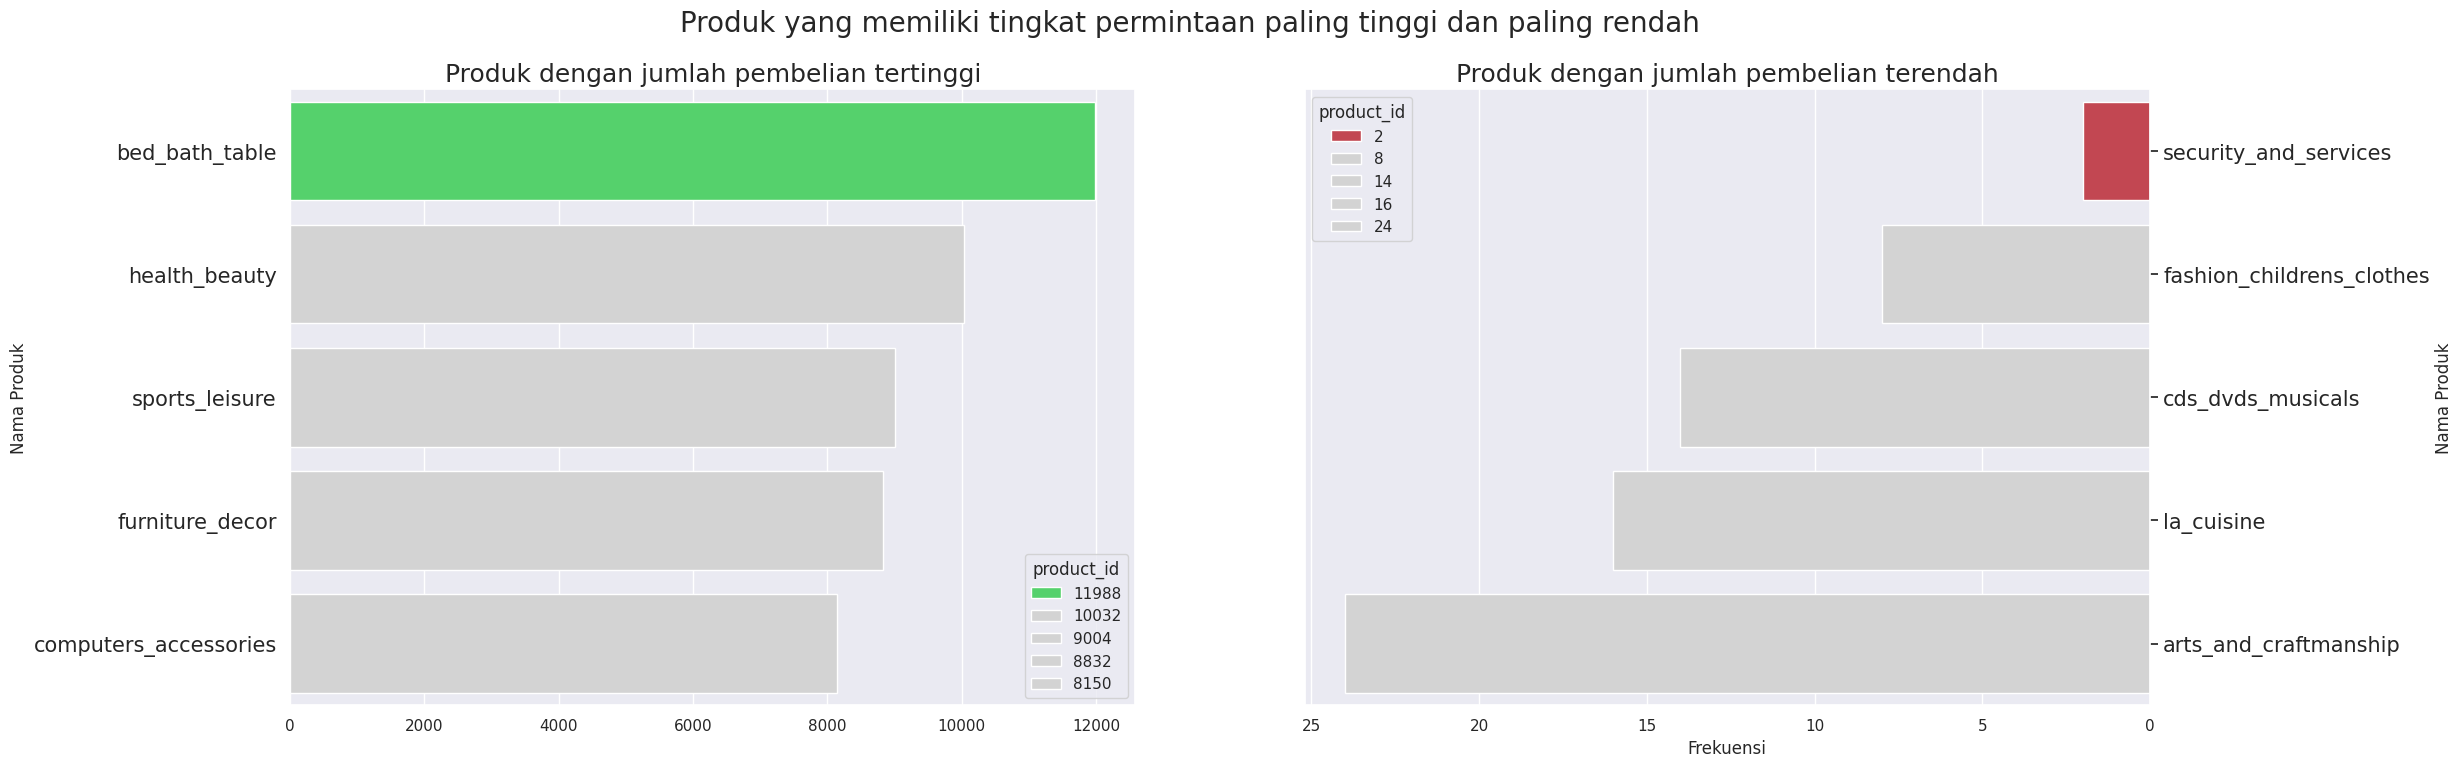

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors_positive = ["#40E65F", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_negative = ["#D63341", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sorted_new = sorted_product.sort_values(by="product_id", ascending=False).head(5)
sns.barplot(x="product_id", y="product_category_name_english",
    data=sorted_product.sort_values(by="product_id", ascending=False).head(5),
    palette=colors_positive, hue="product_id",
    hue_order=sorted(sorted_new['product_id'], reverse=True),
    ax=ax[0])
ax[0].set_xlabel('Frekuensi')
ax[0].set_ylabel('Nama Produk')
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan jumlah pembelian tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english",
    data=sorted_product.sort_values(by="product_id", ascending=True).head(5),
    palette=colors_negative, hue="product_id", ax=ax[1])
ax[1].set_xlabel('Frekuensi')
ax[1].set_ylabel('Nama Produk')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan jumlah pembelian terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk yang memiliki tingkat permintaan paling tinggi dan paling rendah", fontsize=20)
plt.show()

**Insight:**
- **Produk mana yang memiliki tingkat permintaan paling tinggi dan paling rendah?**
 Produk dengan tingkat permintaan tertinggi adalah bed_bath_table dengan **11.988 pembelian** (ditandai dengan warna hijau), sedangkan produk dengan tingkat permintaan terendah adalah security_and_services dengan **2 pembelian** (ditandai dengan warna merah).

### Pertanyaan 2:

Bagaimana data jumlah pesanan yang dilakukan setiap bulan?

cek dari kolom order_approved_at dan jumlah order


In [ ]:
df_bulanan = df_all.set_index('order_approved_at').resample('ME').order_id.nunique().to_frame()
df_bulanan.columns = ['total_orders']
df_bulanan


,total_orders
order_approved_at,
2016-09-30,1
2016-10-31,320
2016-11-30,0
2016-12-31,1
2017-01-31,760
2017-02-28,1765
2017-03-31,2689
2017-04-30,2374
2017-05-31,3693


In [ ]:
df_bulanan.index


DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [ ]:
df_bulanan.index = df_bulanan.index.strftime('%Y-%B') #ubah format order_approved_at menjadi Tahun-Bulan
df_bulanan = df_bulanan.reset_index()
df_bulanan.rename(columns={
    "order_id": "order_count",
}, inplace=True)
df_bulanan

,order_approved_at,total_orders
0,2016-September,1
1,2016-October,320
2,2016-November,0
3,2016-December,1
4,2017-January,760
5,2017-February,1765
6,2017-March,2689
7,2017-April,2374
8,2017-May,3693
9,2017-June,3252


In [ ]:
orders_sorted_df = orders_df.sort_values(by=['order_approved_at'], ascending=True)
orders_sorted_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
64058,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,delivered,2016-10-04 09:16:33,2016-10-04 09:43:32,2016-10-21 16:33:45,2016-10-24 16:33:45,2016-11-24
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23
67037,ed8c7b1b3eb256c70ce0c74231e1da88,da0ba2a9935bca5b4610b0e3bca9d3b4,delivered,2016-10-04 09:59:03,2016-10-04 10:25:46,2016-11-11 15:29:14,2016-11-18 08:51:07,2016-11-24
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


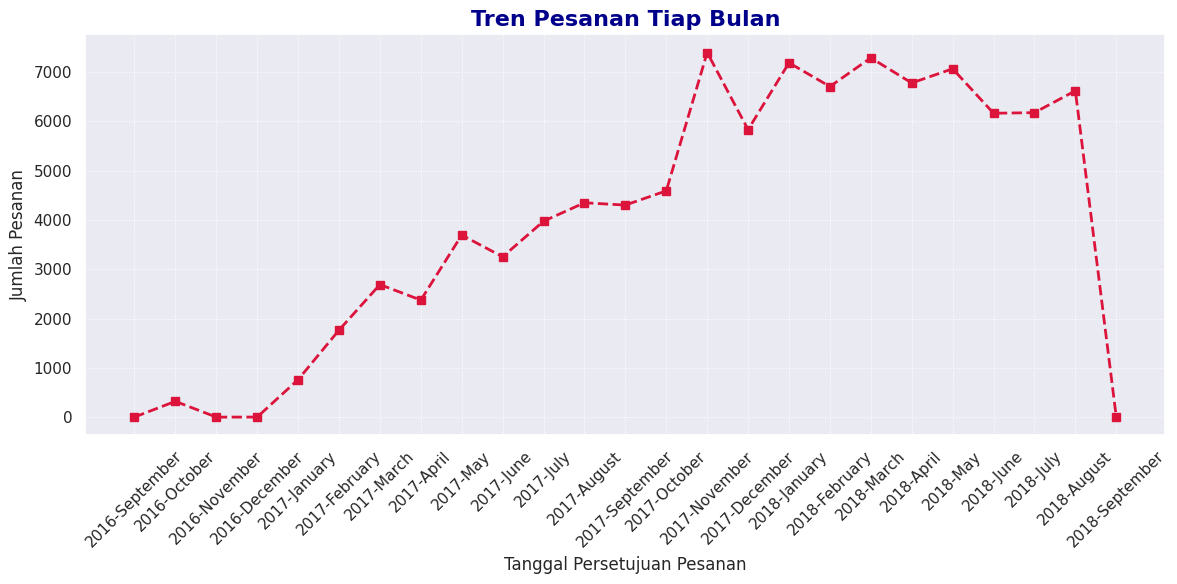

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(df_bulanan['order_approved_at'], df_bulanan['total_orders'], marker='s', linestyle='--', color='crimson', linewidth=2)

plt.title('Tren Pesanan Tiap Bulan', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Tanggal Persetujuan Pesanan', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()


**Insight:**
- **Bagaimana data jumlah pesanan yang dilakukan setiap bulan?**
Berdasarkan visualisasi data, jumlah pesanan tertinggi terjadi pada November 2017. Terdapat peningkatan pesanan dari Desember 2016 hingga November 2017, kemudian stabil antara Januari 2018 hingga Mei 2018.

### Pertanyaan 3:

Bagaimana tingkat kepuasan pembeli?

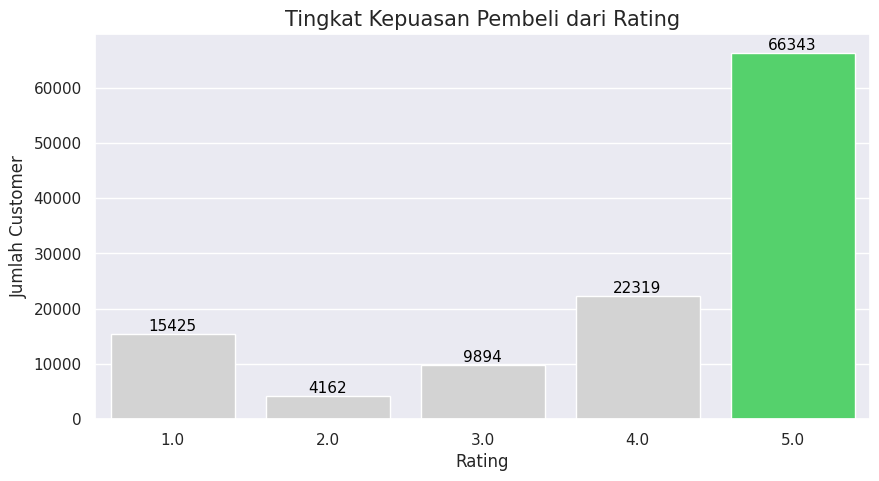

In [ ]:
rating_service = df_all['review_score'].value_counts().sort_index()  # Pastikan rating tetap terurut
rating_df = rating_service.reset_index()
rating_df.columns = ['review_score', 'frequency']

max_score = rating_service.idxmax()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    x=rating_service.index,
    y=rating_service.values,
    hue=rating_service.index,
    palette=["#40E65F" if score == max_score else "#D3D3D3" for score in rating_service.index],
    legend=False
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Menampilkan angka jumlah rating
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Posisi teks di atas bar
        ha='center', va='bottom', fontsize=11, color='black'
    )

plt.title("Tingkat Kepuasan Pembeli dari Rating", fontsize=15)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(fontsize=11)

plt.show()


**Insight:**
- **Bagaimana tingkat kepuasan pembeli?**
Berdasarkan visualisasi di atas, rating 5 menjadi yang paling dominan dengan jumlah 66.343 pelanggan, ditandai dengan warna hijau. Selanjutnya, disusul rating 4 dengan paling dominan.

### Pertanyaan 4:

Di wilayah mana jumlah pelanggan paling banyak berdasarkan lokasi geografis?

In [ ]:
geolocation_df


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [ ]:
geolocation_new = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
geolocation_new[geolocation_new['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_map = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_map = geolocation_map.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_geolocation_map =customers_df.merge(geolocation_map,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')


In [ ]:
customers_geolocation_map.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.730435,-46.541474
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531294,-46.656980
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,mogi das cruzes,SP,-23.499025,-46.183436
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,campinas,SP,-22.974331,-47.142173


In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://www.mapsland.com/maps/south-america/brazil/map-of-brazil-with-cities-small.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -32.189, -34.4789, 9.6], aspect='auto')
    plt.show()

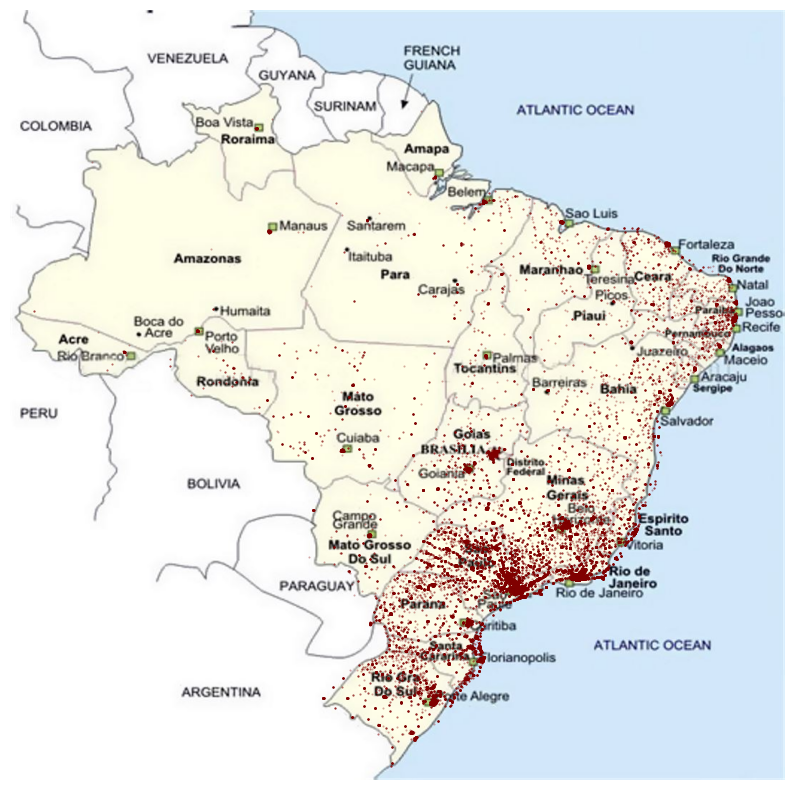

In [ ]:
plot_brazil_map(customers_geolocation_map.drop_duplicates(subset='customer_unique_id'))


**Insight:**
- **Di wilayah mana jumlah pelanggan paling banyak berdasarkan lokasi geografis?**
Berdasarkan visualisasi data, pelanggan dengan jumlah pembelian terbanyak berada di wilayah selatan Brasil, seperti **Provinsi Sao Paulo, Rio de Janeiro, Parana, Santa Catarina, dan Rio Grande do Sul**. Hal ini terlihat dari banyaknya titik merah yang padat di wilayah tersebut. Menariknya, kepadatan titik-titik ini sebagian besar terkonsentrasi di ibu kota masing-masing provinsi.

## Conclusion

- Produk mana yang memiliki tingkat permintaan paling tinggi dan paling rendah?
- Bagaimana data jumlah pesanan yang dilakukan setiap bulan?
- Bagaimana tingkat kepuasan pembeli?
- Di wilayah mana jumlah pelanggan paling banyak berdasarkan lokasi geografis?




**1.Produk mana yang memiliki tingkat permintaan paling tinggi dan paling rendah?**


Produk *bed_bath_table* memiliki tingkat permintaan tertinggi dengan 11.988 pembelian, sedangkan produk *security_and_services* memiliki permintaan terendah dengan hanya 2 pembelian.

**2.Bagaimana data jumlah/tren pesanan yang dilakukan setiap bulan?**


Jumlah pesanan mengalami peningkatan dari Desember 2016 hingga November 2017, dengan puncaknya terjadi pada November 2017. Setelah itu, pesanan cenderung stabil antara Januari hingga Mei 2018.

**3.Bagaimana tingkat kepuasan pembeli?**


Rating 5 menjadi yang paling dominan dengan 66.343 pelanggan, diikuti oleh rating 4 sebagai peringkat berikutnya yang banyak diberikan pelanggan.

**4.Di wilayah mana jumlah pelanggan paling banyak berdasarkan lokasi geografis?**


Pelanggan dengan jumlah pembelian terbanyak berada di wilayah selatan Brasil, terutama di Provinsi Sao Paulo, Rio de Janeiro, Parana, Santa Catarina, dan Rio Grande do Sul. Kepadatan pembelian paling tinggi terlihat di ibu kota masing-masing provinsi.